In [2]:
import numpy as np
from os.path import isfile,join
from os import listdir
from scipy import signal as sg
from scipy.signal import butter,lfilter,freqz
import matplotlib.pyplot as plt
from scipy import hamming
import soundfile as sf
import scipy
import numpy
from scipy.fftpack import dct
from python_speech_features import mfcc
from python_speech_features import logfbank
from scipy.fftpack import fft
from scipy.io import wavfile
import soundfile as sf
import math
import tensorflow
from keras.utils import np_utils
from keras.models import Sequential
from keras.models import model_from_yaml
from keras.models import model_from_json
from keras.layers import Dense

from keras import backend
from keras.layers import Embedding
from keras.layers import LSTM
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
#from sklearn.preprocessing import StandardbScaler

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\users\user\appdata\

In [3]:
babycry=[f for f in listdir('/Users/User/Desktop/babycry') if isfile(join('/Users/User/Desktop/babycrycry', f))]

nonbabycry=[f for f in listdir('/Users/User/Desktop/Environmentsounds') if isfile(join('/Users/User/Desktop/Environmentsounds', f))]
babysilence=[f for f in listdir('/Users/User/Desktop/901 - Silence') if isfile(join('/Users/User/Desktop/901 - Silence', f))]
babylaugh=[f for f in listdir('/Users/User/Desktop/903 - Baby laugh') if isfile(join('/Users/User/Desktop/903 - Baby laugh',f))]


In [4]:
baby_cry=[]
for each in range(0,len(babycry)) :
    cry='/Users/User/Desktop/babycry' + '/' + babycry[each] 
    baby_cry.append(cry)


In [5]:
len(baby_cry)

718

In [6]:
non_babycry=[]
for each in range(0,len(nonbabycry)) :
    x='/Users/User/Desktop/Environmentsounds' + '/' + nonbabycry[each] 
    non_babycry.append(x)

In [7]:
len(non_babycry)

456

In [8]:
baby_silence=[]
for each in range(0,len(babysilence)) :
    silence='/Users/User/Desktop/901 - Silence' + '/' + babysilence[each] 
    baby_silence.append(silence)


In [9]:
baby_laugh=[]
for each in range(0,len(babylaugh)) :
    laugh='/Users/User/Desktop/903 - Baby laugh' + '/' + babylaugh[each] 
    baby_laugh.append(laugh)
  

In [10]:
nonbaby_cry=baby_silence+baby_laugh+non_babycry

In [11]:
len(nonbaby_cry)

556

In [12]:
def butter_lowpass(cutoff,fs,order=5):
    nyq=0.5*fs
    normal_cutoff=cutoff/nyq
    b,a=butter(order,normal_cutoff,btype='low',analog=False)
    return b,a

In [13]:
def butter_lowpass_filter(data,cutoff,fs,order=5):
    b,a=butter_lowpass(cutoff,fs,order=order)
    y=lfilter(b,a,data)
    return y

In [14]:
def feature(soundfile):
    s,r=sf.read(soundfile)
    x=np.array_split(s,32)
    
    logg=[]
    for i in x:
             
             xx=np.mean(logfbank(i,r,nfilt=40,nfft=1103),axis=0)
             logg.append(xx)
        
    return  logg  

In [15]:
r=feature(baby_cry[10])

In [16]:
r

[array([-28.62851422, -27.84820732, -27.21412695, -26.60184126,
        -26.13161163, -25.74212166, -25.78320837, -25.67160043,
        -25.4090301 , -24.99600193, -24.58375783, -24.91808455,
        -24.98466569, -24.79628858, -24.75180097, -24.5904802 ,
        -24.48367605, -24.31771894, -24.53629292, -24.87311987,
        -24.89886136, -24.56554976, -24.09539538, -23.83710433,
        -23.92568305, -24.13649268, -24.21531702, -23.83520889,
        -23.83581707, -23.95595465, -24.1581866 , -24.03936812,
        -24.29335795, -24.13555   , -24.21999205, -24.05891085,
        -23.82651402, -23.91473958, -23.95904253, -23.94088916]),
 array([-14.41683739, -14.22926577, -14.23759694, -14.00495188,
        -13.6676391 , -13.22944962, -13.35113344, -13.1047758 ,
        -12.09913443,  -9.66085331,  -9.51343909, -11.54108086,
        -11.97534143, -11.70004931, -11.368297  , -10.49710185,
         -7.72576724,  -7.53916289,  -9.82926716, -10.72407214,
        -10.68486776,  -8.95054846,  -

In [17]:
#j=np.mean(r,axis=0)
np.shape(r)

(32, 40)

In [18]:
data=np.zeros((1274,32,40))
output=[]
for i in range(0,len(baby_cry)):
       r=feature(baby_cry[i])
       
       #r=list(r)
       data[i,:,:]=r
       output.append(1) 
        
all=baby_cry+nonbabycry
for i in range(len(baby_cry)-1,len(all)-1):
       #r=list(r)
       r=feature(all[i])
       
       data[i,:,:]=r
       output.append(0)

W0911 13:07:24.828573 16812 sigproc.py:82] frame length (1200) is greater than FFT size (1103), frame will be truncated. Increase NFFT to avoid.
W0911 13:07:24.852560 16812 sigproc.py:82] frame length (1200) is greater than FFT size (1103), frame will be truncated. Increase NFFT to avoid.
W0911 13:07:24.879544 16812 sigproc.py:82] frame length (1200) is greater than FFT size (1103), frame will be truncated. Increase NFFT to avoid.
W0911 13:07:24.913527 16812 sigproc.py:82] frame length (1200) is greater than FFT size (1103), frame will be truncated. Increase NFFT to avoid.
W0911 13:07:24.938511 16812 sigproc.py:82] frame length (1200) is greater than FFT size (1103), frame will be truncated. Increase NFFT to avoid.
W0911 13:07:24.964496 16812 sigproc.py:82] frame length (1200) is greater than FFT size (1103), frame will be truncated. Increase NFFT to avoid.
W0911 13:07:24.987483 16812 sigproc.py:82] frame length (1200) is greater than FFT size (1103), frame will be truncated. Increase 

RuntimeError: Error opening '1-100210-B-36.wav': System error.

In [19]:
def Mfcc(audiofile):
    s,r=sf.read(audiofile)
    #print(len(s.shape))
    #if len(s.shape)==2:
     #   s=s[0,:]
    #print(len(s.shape))

    x=np.array_split(s,64)
    #print(x)
    logg=np.zeros((64,12))
    for i in range(len(x)):
        
        
        m=np.mean(mfcc(x[i],r, numcep=12,nfft=2048),axis=0)
        #print(np.shape(m))
        xx= m
        logg[i,:]=m

    return logg


In [20]:
r=Mfcc(baby_cry[10])

In [21]:
np.shape(r)

(64, 12)

In [22]:
r

array([[-3.03665216e+01, -4.57550311e+00, -3.99399172e+00,
        -4.31613429e+00, -1.44517924e+00, -3.87994372e+00,
         4.11461830e-01, -1.69904198e+00,  5.73532145e-01,
        -2.76804490e+00,  4.11874044e-01,  1.37757840e+00],
       [-1.37898678e+01, -1.54246810e+01, -1.18830528e+01,
        -6.32193930e+00, -1.40081165e+01, -1.10962681e+01,
         9.67936638e-02, -6.92004462e+00, -7.84854645e+00,
         2.13759873e+00, -7.01583323e-01, -7.02918085e+00],
       [-6.09363061e+00, -1.86213149e+01, -2.31077038e+01,
        -7.28796388e+00, -1.31155010e+01,  5.11964421e+00,
        -7.22549540e+00, -2.54651722e+00, -1.91921965e+00,
         3.23640458e+01,  8.76400718e+00, -1.62083219e+01],
       [-2.16876339e+00, -3.43038188e+01, -9.96763472e+00,
        -5.35531858e-01, -1.50162433e+01,  3.64287787e+00,
        -5.67288706e+00,  1.80727381e+00, -2.96618783e+00,
         2.99185234e+01,  1.04021876e+01, -3.12900207e+00],
       [-1.20477197e+00, -3.83812531e+01, -2.0484769

In [23]:
data=np.zeros((1274,64,12))
output=[]
for i in range(0,len(baby_cry)):
       print(baby_cry[i])
       r=Mfcc(baby_cry[i])
       
       #r=list(r)
       data[i,:,:]=r
       output.append(1) 
        
all=baby_cry+nonbaby_cry
for i in range(len(baby_cry)-1,len(all)-1):
       #r=list(r)
       #print(all[i]) 
       r=Mfcc(all[i])
       
       data[i,:,:]=r
       output.append(0)  

/Users/User/March20cry/donatecry/0233.wav
/Users/User/March20cry/donatecry/02c3b725-26e4-4a2c-9336-04ddc58836d9-1430726196216-1.7-m-04-hu.wav
/Users/User/March20cry/donatecry/02ead89b-aa02-453e-8b83-6ebde9fe7551-1430233132879-1.7-m-26-hu.wav
/Users/User/March20cry/donatecry/035c6b30-a145-42b9-8d0f-445cd9003d2c-1435948197257-1.7-m-04-hu.wav
/Users/User/March20cry/donatecry/03abcb8f-400a-47d8-ad82-7e4586cc06be-1431864192133-1.7-f-48-hu.wav
/Users/User/March20cry/donatecry/03ADDCFB-354E-416D-BF32-260CF47F7060-1433658024-1.1-f-04-ti.wav
/Users/User/March20cry/donatecry/045C5483-69E1-4BEC-B1D8-9286D174B9B2-1430102996-1.0-m-04-hu.wav
/Users/User/March20cry/donatecry/04c3386b-e6bc-4bd0-8456-d46ae21a73fc-1435305829013-1.7-f-26-hu.wav
/Users/User/March20cry/donatecry/06c4cfa2-7fa6-4fda-91a1-ea186a4acc64-1430029221058-1.7-f-26-ti.wav
/Users/User/March20cry/donatecry/06c4cfa2-7fa6-4fda-91a1-ea186a4acc64-1430029237378-1.7-f-26-ti.wav
/Users/User/March20cry/donatecry/06c4cfa2-7fa6-4fda-91a1-ea186a4

In [24]:
len(data)

1274

In [25]:
input=data

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_temp, y_train, y_temp = train_test_split(input, output, test_size=0.30, random_state=None)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, stratify = y_temp, test_size=0.5, random_state=None)

In [27]:
print('Shape of X_train:',X_train.shape)
print('Shape of X_val:',X_val.shape)
print('Shape of X_test:',X_test.shape)

Shape of X_train: (891, 64, 12)
Shape of X_val: (191, 64, 12)
Shape of X_test: (192, 64, 12)


In [30]:
from keras.layers import Reshape, Flatten, Dropout, Concatenate, BatchNormalization
from keras.models import Sequential,model_from_json
from keras.layers import Conv2D,Conv1D,MaxPooling1D,GlobalAveragePooling1D,GlobalMaxPooling1D
from keras.layers import MaxPooling2D
from keras.layers import Flatten,Dropout
from keras import optimizers, callbacks
import numpy as np
from keras.layers import Dense,Activation
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator,img_to_array


In [31]:
model1 = Sequential()

model1.add(Conv1D(10, 2, activation='relu', input_shape=(64,12)))
model1.add(Conv1D(6,2,padding='valid', activation='relu',strides=1))
model1.add(Dropout(0.2))
model1.add(BatchNormalization(epsilon=0.001, mode=0, momentum=0.9, weights=None))


model1.add(GlobalMaxPooling1D())
model1.add(Dropout(0.2))
model1.add(Dense(40))
model1.add(Dropout(0.2))
model1.add(Activation('relu'))
model1.add(BatchNormalization(epsilon=0.001, mode=0, momentum=0.9, weights=None))

model1.add(Dense(1))
model1.add(Activation('sigmoid'))

W0911 13:24:07.876888 16812 deprecation_wrapper.py:119] From c:\users\user\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0911 13:24:08.201594 16812 deprecation_wrapper.py:119] From c:\users\user\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0911 13:24:08.656953 16812 deprecation_wrapper.py:119] From c:\users\user\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0911 13:24:08.707922 16812 deprecation.py:506] From c:\users\user\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:3445: calling dropout (from tensorflow.pyth

In [32]:
from keras.optimizers import Adam
model1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

W0911 13:24:14.537046 16812 deprecation_wrapper.py:119] From c:\users\user\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W0911 13:24:14.546041 16812 deprecation.py:323] From c:\users\user\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\ops\nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [33]:
history = model1.fit(X_train, y_train, nb_epoch=100, validation_data=(X_val,y_val),batch_size=10, shuffle=False,verbose=2)


c:\users\user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 891 samples, validate on 191 samples
Epoch 1/100
 - 6s - loss: 0.6539 - acc: 0.6700 - val_loss: 0.4127 - val_acc: 0.8743
Epoch 2/100
 - 1s - loss: 0.4942 - acc: 0.7789 - val_loss: 0.3538 - val_acc: 0.8901
Epoch 3/100
 - 1s - loss: 0.4577 - acc: 0.8002 - val_loss: 0.3263 - val_acc: 0.8953
Epoch 4/100
 - 1s - loss: 0.4256 - acc: 0.8182 - val_loss: 0.2993 - val_acc: 0.9058
Epoch 5/100
 - 1s - loss: 0.3924 - acc: 0.8406 - val_loss: 0.2715 - val_acc: 0.9162
Epoch 6/100
 - 1s - loss: 0.3754 - acc: 0.8440 - val_loss: 0.2594 - val_acc: 0.9267
Epoch 7/100
 - 1s - loss: 0.3450 - acc: 0.8620 - val_loss: 0.2382 - val_acc: 0.9319
Epoch 8/100
 - 1s - loss: 0.3402 - acc: 0.8552 - val_loss: 0.2142 - val_acc: 0.9267
Epoch 9/100
 - 1s - loss: 0.2956 - acc: 0.8855 - val_loss: 0.2106 - val_acc: 0.9372
Epoch 10/100
 - 1s - loss: 0.3151 - acc: 0.8799 - val_loss: 0.1970 - val_acc: 0.9424
Epoch 11/100
 - 1s - loss: 0.3037 - acc: 0.8945 - val_loss: 0.1896 - val_acc: 0.9372
Epoch 12/100
 - 1s - loss: 0

In [34]:
model1.evaluate(X_val,y_val)

191/191 [==============================] - 0s 2ms/step


[0.09875815226184448, 0.9738219895287958]

In [35]:
model1.evaluate(X_test,y_test)

192/192 [==============================] - 0s 83us/step


[0.16935716569423676, 0.9583333333333334]

In [36]:
from keras.layers import Reshape, Flatten, Dropout, Concatenate, BatchNormalization

model2 = Sequential()
model2.add(Conv1D(64, 2, activation='relu', input_shape=(64, 12))) # first convolutional layer
model2.add(Conv1D(40,2,padding='valid', activation='relu',strides=1)) # second convolutional layer
model2.add(Dropout(0.4))
model2.add(GlobalMaxPooling1D())
model2.add(Dense(40))
model2.add(Dropout(0.4))
model2.add(Activation('relu'))
model2.add(BatchNormalization(epsilon=0.001, mode=0, momentum=0.9, weights=None))
model2.add(Dense(1))# fully connected layer model predicts 1 or 0
model2.add(Activation('sigmoid'))

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Update your `BatchNormalization` call to the Keras 2 API: `BatchNormalization(epsilon=0.001, momentum=0.9, weights=None)`
  # This is added back by InteractiveShellApp.init_path()


In [37]:
from keras.optimizers import Adam
model2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [38]:
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_3 (Conv1D)            (None, 63, 64)            1600      
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 62, 40)            5160      
_________________________________________________________________
dropout_4 (Dropout)          (None, 62, 40)            0         
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 40)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 40)                1640      
_________________________________________________________________
dropout_5 (Dropout)          (None, 40)                0         
_________________________________________________________________
activation_3 (Activation)    (None, 40)                0         
__________

In [39]:
history = model2.fit(X_train, y_train, nb_epoch=100, validation_data=(X_val,y_val),batch_size=10, shuffle=False,verbose=2)


c:\users\user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 891 samples, validate on 191 samples
Epoch 1/100
 - 2s - loss: 0.4767 - acc: 0.7991 - val_loss: 0.3676 - val_acc: 0.9110
Epoch 2/100
 - 1s - loss: 0.3482 - acc: 0.8608 - val_loss: 0.2919 - val_acc: 0.9372
Epoch 3/100
 - 1s - loss: 0.2987 - acc: 0.8878 - val_loss: 0.2301 - val_acc: 0.9529
Epoch 4/100
 - 1s - loss: 0.2772 - acc: 0.9057 - val_loss: 0.2258 - val_acc: 0.9319
Epoch 5/100
 - 1s - loss: 0.2525 - acc: 0.9046 - val_loss: 0.2168 - val_acc: 0.9372
Epoch 6/100
 - 1s - loss: 0.2506 - acc: 0.9057 - val_loss: 0.1948 - val_acc: 0.9424
Epoch 7/100
 - 1s - loss: 0.2485 - acc: 0.9091 - val_loss: 0.1733 - val_acc: 0.9581
Epoch 8/100
 - 1s - loss: 0.2064 - acc: 0.9293 - val_loss: 0.1666 - val_acc: 0.9686
Epoch 9/100
 - 1s - loss: 0.2092 - acc: 0.9259 - val_loss: 0.1470 - val_acc: 0.9686
Epoch 10/100
 - 1s - loss: 0.1832 - acc: 0.9416 - val_loss: 0.1470 - val_acc: 0.9738
Epoch 11/100
 - 1s - loss: 0.1724 - acc: 0.9327 - val_loss: 0.1264 - val_acc: 0.9738
Epoch 12/100
 - 1s - loss: 0

In [40]:
model2.evaluate(X_val,y_val)

191/191 [==============================] - 0s 256us/step


[0.05026434006959356, 0.9790575869420436]

In [41]:
model2.evaluate(X_test,y_test)

192/192 [==============================] - 0s 125us/step


[0.15036958487083515, 0.953125]

In [42]:
model2.evaluate(X_train,y_train)

891/891 [==============================] - 0s 108us/step


[0.013175933884182896, 1.0]

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


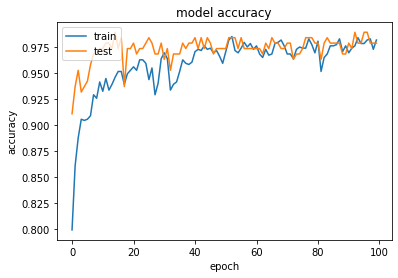

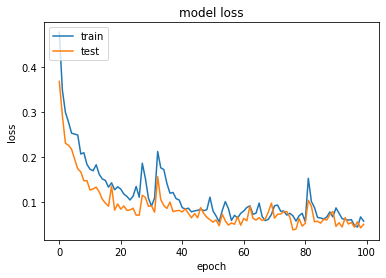

In [43]:
print(history.history.keys())
#  "Accuracy"
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [44]:
model3 = Sequential()
model3.add(Conv1D(64, 2, input_shape=(64, 12)))
model3.add(Activation('relu'))
model3.add(Conv1D(64, 2))
model3.add(Activation('relu'))
model3.add(MaxPooling1D())
model3.add(Conv1D(128, 2))
model3.add(Activation('relu'))
model3.add(Conv1D(128, 2))
model3.add(Activation('relu'))
model3.add(GlobalAveragePooling1D())
model3.add(Dropout(0.5))
model3.add(Dense(1))
model3.add(Activation('sigmoid'))


W0911 13:27:28.622152 16812 deprecation_wrapper.py:119] From c:\users\user\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



In [45]:
from keras.optimizers import Adam
model3.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [46]:
history = model3.fit(X_train, y_train, nb_epoch=100, validation_data=(X_test,y_test),batch_size=10, shuffle=False,verbose=2)


c:\users\user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 891 samples, validate on 192 samples
Epoch 1/100
 - 2s - loss: 0.3603 - acc: 0.8676 - val_loss: 0.1490 - val_acc: 0.9427
Epoch 2/100
 - 1s - loss: 0.1612 - acc: 0.9360 - val_loss: 0.1029 - val_acc: 0.9531
Epoch 3/100
 - 1s - loss: 0.1296 - acc: 0.9517 - val_loss: 0.1069 - val_acc: 0.9531
Epoch 4/100
 - 1s - loss: 0.0648 - acc: 0.9731 - val_loss: 0.1365 - val_acc: 0.9479
Epoch 5/100
 - 1s - loss: 0.0856 - acc: 0.9652 - val_loss: 0.1396 - val_acc: 0.9583
Epoch 6/100
 - 1s - loss: 0.0889 - acc: 0.9675 - val_loss: 0.1642 - val_acc: 0.9271
Epoch 7/100
 - 1s - loss: 0.0573 - acc: 0.9776 - val_loss: 0.0750 - val_acc: 0.9687
Epoch 8/100
 - 1s - loss: 0.0295 - acc: 0.9933 - val_loss: 0.1151 - val_acc: 0.9583
Epoch 9/100
 - 1s - loss: 0.0275 - acc: 0.9888 - val_loss: 0.2016 - val_acc: 0.9427
Epoch 10/100
 - 1s - loss: 0.0247 - acc: 0.9888 - val_loss: 0.1599 - val_acc: 0.9635
Epoch 11/100
 - 1s - loss: 0.0556 - acc: 0.9832 - val_loss: 0.1949 - val_acc: 0.9323
Epoch 12/100
 - 1s - loss: 0

In [68]:
model3.evaluate(X_val,y_val)

191/191 [==============================] - 0s 502us/step


[0.37551097290990243, 0.9476439743765985]

In [69]:
model3.evaluate(X_test,y_test)

192/192 [==============================] - 0s 547us/step


[0.19456417194245054, 0.9739583333333334]

In [70]:
model3.evaluate(X_train,y_train)

892/892 [==============================] - 0s 339us/step


[0.003302641998025831, 0.9988789237668162]

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


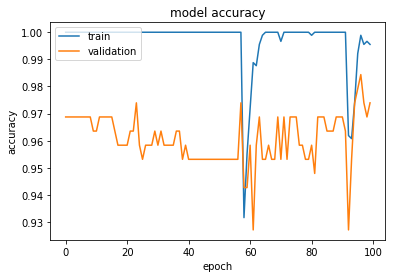

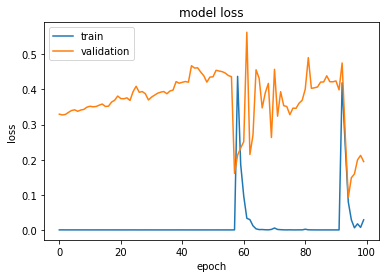

In [71]:
print(history.history.keys())
#  "Accuracy"
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [56]:
model4 = Sequential()
model4.add(Conv1D(64, 2, input_shape=(64, 12)))
model4.add(Activation('relu'))
model4.add(Conv1D(64, 2))
model4.add(Activation('relu'))
model4.add(MaxPooling1D(3))
model4.add(Conv1D(128, 2))
model4.add(Activation('relu'))
model4.add(Conv1D(128, 2))
model4.add(Activation('relu'))
model4.add(GlobalAveragePooling1D())
model4.add(Dropout(0.2))
model4.add(Dense(1))
model4.add(Activation('sigmoid'))


In [57]:
model4.compile(loss='binary_crossentropy',optimizer=Adam(lr=0.0001),metrics=['accuracy'])

In [58]:
history = model4.fit(X_train, y_train, nb_epoch=100, validation_data=(X_val,y_val),batch_size=10, shuffle=False,verbose=2)


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 892 samples, validate on 191 samples
Epoch 1/100
 - 3s - loss: 0.5898 - acc: 0.7489 - val_loss: 0.4334 - val_acc: 0.8220
Epoch 2/100
 - 2s - loss: 0.3718 - acc: 0.8397 - val_loss: 0.3256 - val_acc: 0.8639
Epoch 3/100
 - 2s - loss: 0.2703 - acc: 0.8879 - val_loss: 0.2843 - val_acc: 0.8901
Epoch 4/100
 - 2s - loss: 0.2295 - acc: 0.9126 - val_loss: 0.2720 - val_acc: 0.8901
Epoch 5/100
 - 1s - loss: 0.2037 - acc: 0.9137 - val_loss: 0.2627 - val_acc: 0.8953
Epoch 6/100
 - 1s - loss: 0.1883 - acc: 0.9249 - val_loss: 0.2586 - val_acc: 0.8953
Epoch 7/100
 - 1s - loss: 0.1644 - acc: 0.9339 - val_loss: 0.2308 - val_acc: 0.9162
Epoch 8/100
 - 1s - loss: 0.1452 - acc: 0.9372 - val_loss: 0.2056 - val_acc: 0.9267
Epoch 9/100
 - 1s - loss: 0.1316 - acc: 0.9462 - val_loss: 0.2218 - val_acc: 0.9215
Epoch 10/100
 - 1s - loss: 0.1298 - acc: 0.9518 - val_loss: 0.2047 - val_acc: 0.9319
Epoch 11/100
 - 1s - loss: 0.1215 - acc: 0.9585 - val_loss: 0.1689 - val_acc: 0.9529
Epoch 12/100
 - 1s - loss: 0

In [47]:
model4.evaluate(X_val,y_val)

NameError: name 'model4' is not defined

In [60]:
model4.evaluate(X_test,y_test)

192/192 [==============================] - 0s 307us/step


[0.12017241461823384, 0.96875]

In [72]:
model4.evaluate(X_train,y_train)

892/892 [==============================] - 0s 288us/step


[0.00019768366956615595, 1.0]

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


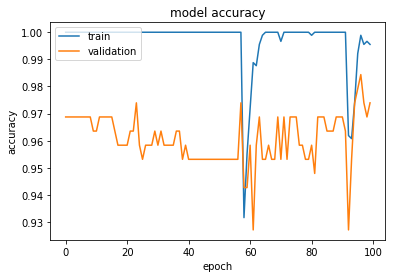

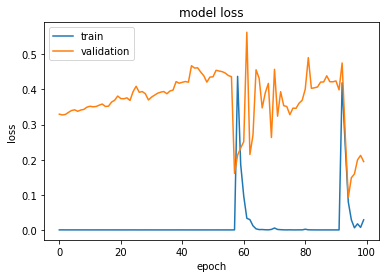

In [73]:
print(history.history.keys())
#  "Accuracy"
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [31]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [32]:
def plot_confusion_matrix(test_y, predicted_y):
    # Confusion matrix
    C = confusion_matrix(test_y, predicted_y)
    # Recall matrix
    A = (((C.T)/(C.sum(axis=1))).T)
    # Precision matrix
    B = (C/C.sum(axis=0))
    plt.figure(figsize=(20,4))
    labels = ['non-babycry(0)','babycry(1)']
    cmap=sns.light_palette("purple")
    plt.subplot(1,3,1)
    sns.heatmap(C, annot=True, cmap=cmap,fmt="d", xticklabels = labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Orignal Class')
    plt.title('Confusion matrix')
    plt.subplot(1,3,2)
    sns.heatmap(A, annot=True, cmap=cmap, xticklabels = labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Orignal Class')
    plt.title('Recall matrix')
    plt.subplot(1,3,3)
    sns.heatmap(B, annot=True, cmap=cmap, xticklabels = labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Orignal Class')
    plt.title('Precision matrix')
    plt.show()

In [53]:
y = model2.predict(X_test)

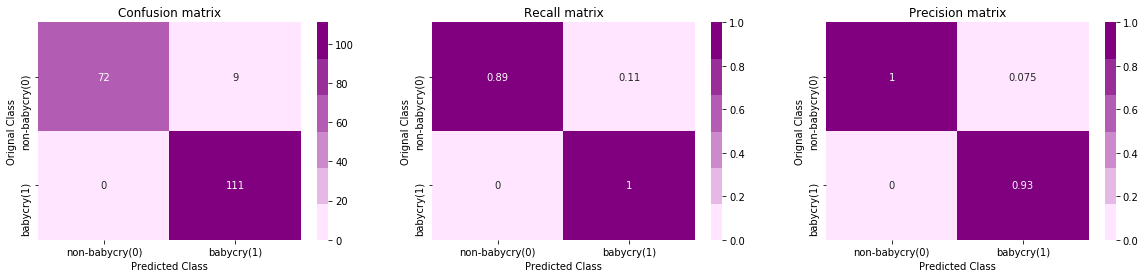

In [54]:
plot_confusion_matrix(y_test, y.round())

In [ ]:
with open('cnn.json','w') as f:
    f.write(model2.to_json())

In [ ]:
model2.save_weights("cnn.h5")